# Dog and Cat Image Classification with PyTorch

![image info](DCC.jpg)

In [1]:
# imports
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
from PIL import Image
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 
import glob 
import torchsummary
import numpy as np, pandas as pd , matplotlib.pyplot as plt
import seaborn as sns 
from torch.utils.data import Dataset , DataLoader
from torchvision.datasets import ImageFolder
from torch.nn.modules.pooling import MaxPool2d
from pathlib import Path
import random
from PIL import Image 

## Data Exploration and Preparation 

In [2]:
import os 
def walk_through_dir(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')
walk_through_dir('training_set')
walk_through_dir('test_set')


There are 2 directories and 0 files in training_set
There are 0 directories and 4001 files in training_set\cats
There are 0 directories and 4006 files in training_set\dogs
There are 2 directories and 0 files in test_set
There are 0 directories and 1012 files in test_set\cats
There are 0 directories and 1013 files in test_set\dogs


Random Image Path training_set\cats\cat.2874.jpg
Image Class cats
Image Height 366
Imahe Width  500


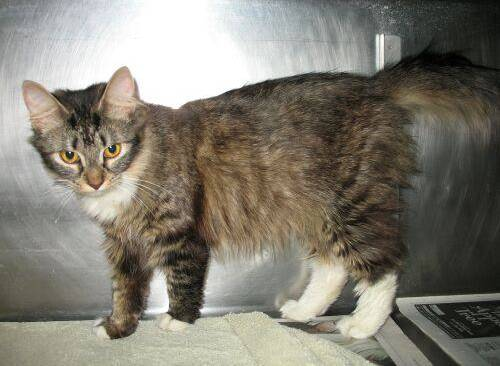

In [3]:
img_path = Path('training_set')
image_path_list = list(img_path.glob('*/*.jpg'))
rand_img_path = random.choice(image_path_list)

image_class = rand_img_path.parent.stem

img = Image.open(rand_img_path)

print(f'Random Image Path {rand_img_path}')
print(f'Image Class {image_class}')
print(f'Image Height {img.height}')
print(f'Imahe Width  {img.width}' )
img

In [4]:
# device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.4),
    transforms.ToTensor()
])
data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.4)
    ToTensor()
)

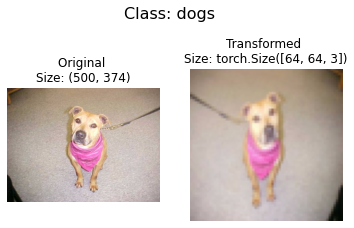

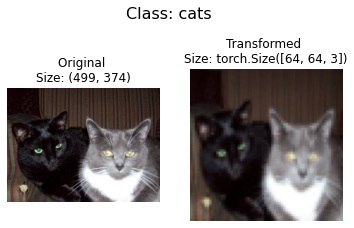

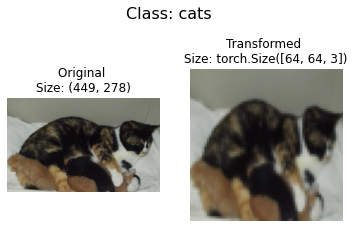

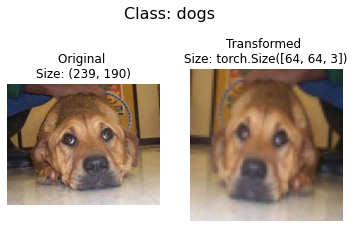

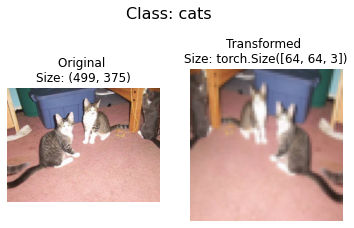

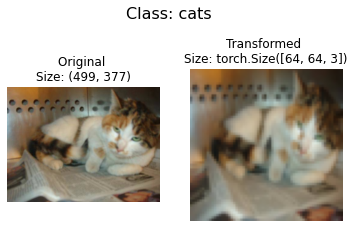

In [6]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=6)

In [7]:
train_dir = 'training_set'
test_dir = 'test_set'
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,)

print(f'Train Data \n {train_data}')
print(f'Test Data \n {test_data}')

Train Data 
 Dataset ImageFolder
    Number of datapoints: 8005
    Root location: training_set
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.4)
               ToTensor()
           )
Test Data 
 Dataset ImageFolder
    Number of datapoints: 2023
    Root location: test_set
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.4)
               ToTensor()
           )


In [8]:
class_names = train_data.classes
class_names

['cats', 'dogs']